# Homework 3_2
## Optimization via Stochastic Gradient Descent

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import scipy.io

np.random.seed(0)


##### Write a Python script that implement the SGD algorithm
      Input:
      l: the function l(w; D) we want to optimize.
      It is supposed to be a Python function, not an array.
      grad_l: the gradient of l(w; D). It is supposed to be a Python function, not an array.
      w0: an n-dimensional array which represents the initial iterate. By default, it
            should be randomly sampled.
      data: a tuple (x, y) that contains the two arrays x and y, where x is the input data,
            y is the output data.
      batch_size: an integer. The dimension of each batch. Should be a divisor of the number of data.
      n_epochs: an integer. The number of epochs you want to reapeat the iterations.
      Output:
      w: an array that contains the value of w_k FOR EACH iterate w_k (not only the latter).
      f_val: an array that contains the value of l(w_k; D)
            FOR EACH iterate w_k ONLY after each epoch.
      grads: an array that contains the value of grad_l(w_k; D)
            FOR EACH iterate w_k ONLY after each epoch.
      err: an array the contains the value of ||grad_l(w_k; D)||_2
            FOR EACH iterate w_k ONLY after each epoch.

In [12]:
def Backtracking(f_, grad_f_, X_, y_, w_):
    X,y,w = X_,y_,w_
    
    alpha = 1
    c = 0.8
    tau = 0.25
    
    while (f_(X,y, w - alpha * grad_f_(X,y,w)) > f_(X,y,w) - c * alpha * np.linalg.norm(grad_f_(X,y, w)) ** 2):
        alpha = tau * alpha
        
        if alpha < 1e-7:
            break
        
    return alpha

Loss is defined as $\frac{1}{N}\sum_i^n MSE(f_w(x_i),y_i)$

$MSE = \frac{1}{2}(f_w(x_i)-y_i)^2 $

In [3]:
def GD(l_: object, grad_l_: object, w0_, data_, kmax_, alpha_ = 1e-3, toll_ = 1e-7, tolx_ = 1e-7, backtracking = False):
                                                                #w0 by default is randomly sampled
    X,y = data_
    
    k = 0                                                       #iteration counter
    w = [w0_]                                                   #array that contains the values of w_k at each iteration
    f_val = [l_(X, y, w0_)]                                     #contains the f function values at each iteration
    grad0 = grad_l_(X, y, w0_)
    grads = [grad0]                                             #contains the value of grad_l(w_k) at each iteration
    err = [np.linalg.norm(grad0)]                               #contains the value of ||grad_l(w_k)|| at each iteration
    
    condition = True
    condition3 = True                                           #for k=0, condition3 is not checked
    while condition:
        condition1 = k < kmax_
        condition2 = np.linalg.norm(grads[-1]) > np.linalg.norm(toll_ * grad0)
        if k != 0:
            condition3 = np.linalg.norm( np.array(w[-1]) - np.array(w[-2]) ) > tolx_    #w[-1] is w_k, w[-2] is w_k-1
        
        condition = (condition1 and condition2 and condition3)  #conditions for stopping the algorithm
                
        if backtracking:
            alpha = Backtracking(l_, grad_l_, X,y, w[-1])       #w[-1] is w_k-1
        else:                                                   #if backtracking=False, fixed alpha is used
            alpha = alpha_
        
        
        #w_k = w[-1] - alpha * np.mean(grads[-1], axis=1)       #making avage of the gradients over the samples
        w_k = w[-1] - alpha * grads[-1]     
                               
        mse_k = l_(X,y, w_k)
        print(f'Iteration {k+1} MSE: {mse_k}, alpha: {alpha}')
        gradient_k = grad_l_(X, y, w_k)
        err_k = np.linalg.norm(gradient_k)
        
        w.append(w_k)
        f_val.append(mse_k)
        grads.append(gradient_k)
        err.append(err_k)
        
        k += 1
        
    return w, k, f_val, grads, err

In [4]:
def SGD(l_: object, grad_l_: object, w0_, data_, batch_size_, n_epochs_, alpha_):
                                                            #w0 by default is randomly sampled
    X,y = data_
    
    w=[w0_]                                                 #initialized to initial iteration, contatins all w_k of different EPOCHS
    f_val=[l_(X, y, w0_)]                                   #contains f(w_k) for each w_k
    grad0 = grad_l_(X, y, w0_)
    grads=[grad0]                                           #contains gradient for each w_k
    err=[np.linalg.norm(grad0)]                             #contains norm of gradient for each w_k

    
    num_batches = int(X.shape[1]/batch_size_)

    for epoch in range( n_epochs_):
        index=0                                             #initialize index to 0 at the beginning of each epoch and add batch_size_ at each iteration over num_batches
        
        for batch in range(num_batches):
            if batch == num_batches-1:                      #if last batch, take all the remaining samples
                X_batch = X[:,index:-1]
                y_batch = y[index:-1, :]
                
            else:                                           #take batch_size_ samples
                X_batch = X[:,index:index+batch_size_]      
                y_batch = y[index:index+batch_size_, :]
                
            batch_gradient = grad_l_(X_batch, y_batch, w[-1])
            #w_k = w[-1] - alpha * np.mean(batch_gradient, axis=1)
            w_k = w[-1] - alpha_ * batch_gradient
            w.append(w_k)
            
            index = index + batch_size_                     #add batch_size_ to slicing index
        

        mse_k = l_(X, y, w_k)                               #loss is defined as mean squared error of the whole dataset
        print(f"epoch:{epoch+1} MSE:{mse_k}")
        
        gradient_k = grad_l_(X, y, w_k)
        err_k = np.linalg.norm(gradient_k)

        f_val.append(mse_k)
        grads.append(gradient_k)
        err.append(err_k)
    
    return w, f_val, grads, err


##### To test the script above, consider the MNIST dataset we used in the previous laboratories, and do the following:
1. From the dataset, select only two digits. It would be great to let the user input the two digits to select.
2. Do the same operation of the previous homework to obtain the training and test set from $(X, Y )$, selecting the $Ntrain$ you prefer.
3. Implement a logistic regression classificator.

##### 1. From the dataset, select only two digits. It would be great to let the user input the two digits to select.


In [77]:
#Load data into memory_____________________________________________________
df = pd.read_csv('./data/data.csv')
data = np.array(df) #convert to numpy array
Y = data[:, 0:1]
X = data[:, 1:]

X = X.T                           #transpose to have features in rows (d dimension of datum)
'''
data = scipy.io.loadmat('./data/MNIST.mat')
X = data['X']
Y = data['I']
'''

print(f'Number of pixels (stored in rows): {X.shape[0]}')
print(f'Number of digit samples (stored in columns): {X.shape[1]}')
print(f'Labels shape: {Y.shape}')


#__________________________________________________________________________
#NOT USED -> SEE def SelectClassesTarget()
#From the dataset isolate ONLY the TWO digits passed from user_____________
def SelectDigits(X_, y_, digits_):
    bool_indexes = ( (y_[:, 0] == digits_[0]) | (y_[:, 0] == digits_[1]) )
    y = y_[bool_indexes, :]
    X = X_[:, bool_indexes]
    
    return X, y



Number of pixels (stored in rows): 784
Number of digit samples (stored in columns): 42000
Labels shape: (42000, 1)


##### 2. Do the same operation of the previous homework to obtain the training and test set from $(X, Y )$, selecting the $Ntrain$ you prefer.


In [5]:
def TrainTestSplit(X_, Y_, n_train_):
    d, n = X_.shape
    
    #define the array of indexes
    indx = np.arange(0, n)
    #randomly shuffle the indexes
    np.random.shuffle(indx)
    
    indx_train = indx[:n_train_]
    indx_test = indx[n_train_:]
    
    #samples in columns__________________________________
    X_train, X_test = X_[:, indx_train], X_[:, indx_test]
    
    Y_train, Y_test = Y_[indx_train, :], Y_[indx_test, :]
    
    return X_train, X_test, Y_train, Y_test             #transpose Y_train and Y_test to have samples in rows


#### 3. Implement a logistic regression classificator.


In [6]:
#______________________________________________________________________________________________________________
#defining sigmoid function
def Sigmoid(z_):
    return 1./(1 + np.exp(-z_))

#______________________________________________________________________________________________________________
#X_hat is the matrix X with a rows of 1s added at row[0]
def XHat(X_):
    Xhat = np.insert(X_, obj=0, values=1, axis=0)

    return Xhat
    

#______________________________________________________________________________________________________________
#defining f_w(x) = sigmoid(x_hat.T w)
def f_w(X_, w_):
    X = X_
    return Sigmoid(X.T @ w_)                        #return a column vector of N elements

In [7]:
#______________________________________________________________________________________________________________
#defining mse as 1/2 *( f_w(x_hat) - y )^2
def MSE(X_, y_, w_):
    N = X_.shape[1]
    
    return (1/(2*N))*(np.linalg.norm(f_w(X_, w_)- y_,2))**2


#______________________________________________________________________________________________________________
#defining gradient of mse as 1/N * sigomid(x_hat.T@w)*(1-sigmoid(x_hat.t@w))@x_hat.T * ( f_w(x_hat) - y )
def MSEGrad(X_, y_, w_):
    N = X_.shape[1]
    #X_hat = XHat(X_)
    X = X_
    sigmoid_res = Sigmoid(X.T @ w_)                 #dim (N,)
    diff = f_w(X, w_) - y_                          #dim (N,)
    
    return (1/N) * ( X @ (sigmoid_res * (1-sigmoid_res) * (diff)) )


In [8]:
#______________________________________________________________________________________________________________
#discretizing values to 0 and 1 for binary classification
def LogisticRegression( X_, f_w_, w_, digits_, threshold=0.5):
    probability = f_w_( X_, w_)
    cond = (probability > threshold)
    
    if cond.all():
        return 1
    else:
        return 0

In [9]:
def Accuracy(X_, y_, w_, f_, digits_):
    X = X_
    total = X.shape[1]
        
    count=0
    for i in range( total):
        pred = LogisticRegression(X[:,i:i+1], f_, w_, digits_)
        if pred == y[i,0]:
            count = count+1
    
    return count/total

In [10]:
#___________________________________________________________________________________________________________________
#selecting only the samples of the two digits passed from user, and setting the target digit to 1 and the other to 0
def SelectClassesTarget(X_, y_, digits_):
    
    X_target = X_[:, (y_[:, 0] == digits_[1])]              #second digit passed is the target
    y_target = np.ones((X_target.shape[1], 1))              
    
    X_notarget = X_[:, (y_[:, 0] == digits_[0])]            #first digit passed is not the target
    y_notarget = np.zeros((X_notarget.shape[1], 1))
    
    X = np.concatenate((X_notarget, X_target), axis=1)      #X is dxN
    y = np.concatenate((y_notarget, y_target), axis=0)      #y is Nx1
    
    return X, y
    

* Test the logistic regression classificator for different digits and different training set dimensions.
* The training procedure will end up with a set of optimal parameters $w^∗$. Compare $w^*$ when computed with Gradient Descent and Stochastic Gradient Descent, for different digits and different training set dimensions.
* Comment the obtained results (in terms of the accuracy of the learned classificator).

##### 2.1 Test the logistic regression classificator for different digits and different training set dimensions.

In [98]:
#select only the two digits passed from user___________________________________
digits = [3, 4]

df = pd.read_csv('./data/data.csv')
data = np.array(df)                                                 #convert to numpy array
Y = data[:, 0:1]
X = data[:, 1:]
X = X.T                                                             #transpose to have dxN
'''
data = scipy.io.loadmat('./data/MNIST.mat')
X = data['X']
Y = data['I']'''

#X, y = SelectDigits(X,Y, digits)
print(f'\nSelected digits: {digits}')
print(f'Number of pixels (stored in rows): {X.shape[0]}')
print(f'Number of digit samples (stored in columns): {X.shape[1]}')


#defining number of training samples to be 75% of the total___________________

X_hat = XHat(X)
Xdef, y = SelectClassesTarget(X_hat, Y, digits)

N_train = int(Xdef.shape[1]*0.75)
X_train, X_test, Y_train, Y_test = TrainTestSplit(Xdef, y, N_train)    #fun also transposes Y_train and Y_test to have samples in rows

'''
#transopose labels to have them in rows________________________________________
Y_train, Y_test = Y_train.T, Y_test.T'''
print(f'Training set: {X_train.shape} Labels - {Y_train.shape}, Testing set: {X_test.shape} Labels - {Y_test.shape}')


Selected digits: [3, 4]
Number of pixels (stored in rows): 784
Number of digit samples (stored in columns): 42000
Training set: (785, 6317) Labels - (6317, 1), Testing set: (785, 2106) Labels - (2106, 1)


##### 2.2 The training procedure will end up with a set of optimal parameters $w^∗$. Compare $w^*$ when computed with Gradient Descent and Stochastic Gradient Descent, for different digits and different training set dimensions.

In [85]:
batches = int(X_train.shape[1]/80)
print(f'Number of batches: {batches}')

Number of batches: 78


/var/folders/74/mfh_yx395gl1npjn4f386mpc0000gn/T/ipykernel_1376/1468652280.py:3: RuntimeWarning: overflow encountered in exp
  return 1./(1 + np.exp(-z_))


Iteration 1 MSE: 0.2112097855326806, alpha: 1
Iteration 2 MSE: 0.21102264343810084, alpha: 0.00390625
Iteration 3 MSE: 0.21087556638623134, alpha: 0.00390625
Iteration 4 MSE: 0.21085367632043162, alpha: 0.0009765625
Iteration 5 MSE: 0.21079469926849587, alpha: 0.00390625
Iteration 6 MSE: 0.2032121747551634, alpha: 1
Iteration 7 MSE: 0.20313187704674854, alpha: 0.00390625
Iteration 8 MSE: 0.20288392138751116, alpha: 0.015625
Iteration 9 MSE: 0.20283107597333602, alpha: 0.00390625
Iteration 10 MSE: 0.2022361693091203, alpha: 0.0625
Iteration 11 MSE: 0.2021440303034398, alpha: 0.00390625
Iteration 12 MSE: 0.2020904116352782, alpha: 0.00390625
Iteration 13 MSE: 0.20196358995256633, alpha: 0.015625
Iteration 14 MSE: 0.20190313511572539, alpha: 0.00390625
Iteration 15 MSE: 0.20187234208846289, alpha: 0.00390625
Iteration 16 MSE: 0.19721155936833615, alpha: 1
Iteration 17 MSE: 0.1971904863994921, alpha: 0.0009765625
Iteration 18 MSE: 0.1971309697800703, alpha: 0.00390625
Iteration 19 MSE: 0.1

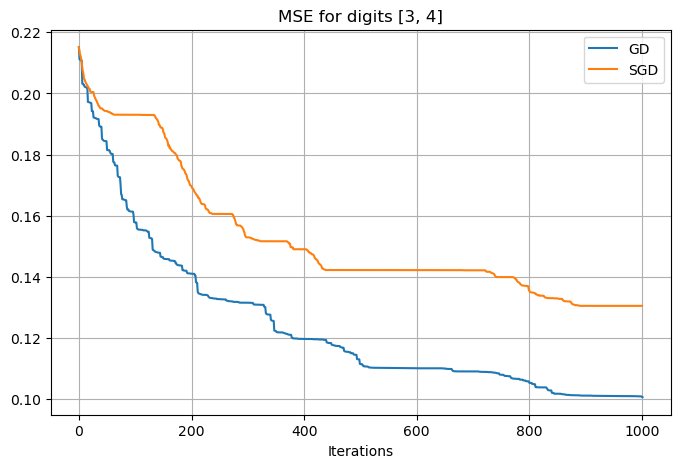

In [99]:
#randomly sample w0 for SGD-GD___________________________________________________________________________________________________
#w0 = np.random.normal(0, 0.0001, X_train.shape[0]).reshape(-1,1)
w0 = np.random.randn(X_train.shape[0], 1)

w_gd, iters, f_val_gd, grads_gd, err_gd = GD(MSE, MSEGrad, w0, data_ = (X_train, Y_train), kmax_= 1000, backtracking = True)
w_sgd, f_val_sgd, grads_sgd, err_sgd = SGD(MSE, MSEGrad, w0, data_ = (X_train, Y_train), batch_size_= 80, n_epochs_= 1000, alpha_= 1e-3)

print(f'\nw* GD: {w_gd[-1].mean()}')
print(f'w* SGD: {w_sgd[-1].mean()}')

acc_gd = Accuracy(X_test, Y_test, w_gd[-1], f_w, digits)
acc_sgd = Accuracy(X_test, Y_test, w_sgd[-1], f_w, digits)

print(f'Accuracy GD: {acc_gd}')
print(f'Accuracy SGD: {acc_sgd}')

plt.figure(figsize=(8, 5))

plt.plot(f_val_gd, label='GD')
plt.plot(f_val_sgd, label='SGD')
plt.xlabel('Iterations')
plt.title(f'MSE for digits {digits}')
plt.grid()
plt.legend()

plt.show()


Selected digits: [1, 3]
Number of pixels (stored in rows): 784
Number of digit samples (stored in columns): 42000
Number of training samples: 6776
Labes - (6776, 1)


/var/folders/74/mfh_yx395gl1npjn4f386mpc0000gn/T/ipykernel_1376/1468652280.py:3: RuntimeWarning: overflow encountered in exp
  return 1./(1 + np.exp(-z_))


Iteration 1 MSE: 0.1321045803410288, alpha: 0.015625
Iteration 2 MSE: 0.13205308759916096, alpha: 0.015625
Iteration 3 MSE: 0.13204304790468108, alpha: 0.00390625
Iteration 4 MSE: 0.13203617457034106, alpha: 0.00390625
Iteration 5 MSE: 0.13203137946871493, alpha: 0.00390625
Iteration 6 MSE: 0.13202785749706933, alpha: 0.00390625
Iteration 7 MSE: 0.1320251886276144, alpha: 0.00390625
Iteration 8 MSE: 0.13202312182959597, alpha: 0.00390625
Iteration 9 MSE: 0.13201759733614074, alpha: 0.015625
Iteration 10 MSE: 0.13201526000267577, alpha: 0.015625
Iteration 11 MSE: 0.13201394947484268, alpha: 0.015625
Iteration 12 MSE: 0.13201310391607185, alpha: 0.015625
Iteration 13 MSE: 0.13201251006540293, alpha: 0.015625
Iteration 14 MSE: 0.1320120682066635, alpha: 0.015625
Iteration 15 MSE: 0.132010901239589, alpha: 0.0625
Iteration 16 MSE: 0.1320030012293809, alpha: 1
Iteration 17 MSE: 0.13134270828220537, alpha: 1
Iteration 18 MSE: 0.13129011567754062, alpha: 0.00390625
Iteration 19 MSE: 0.1311540

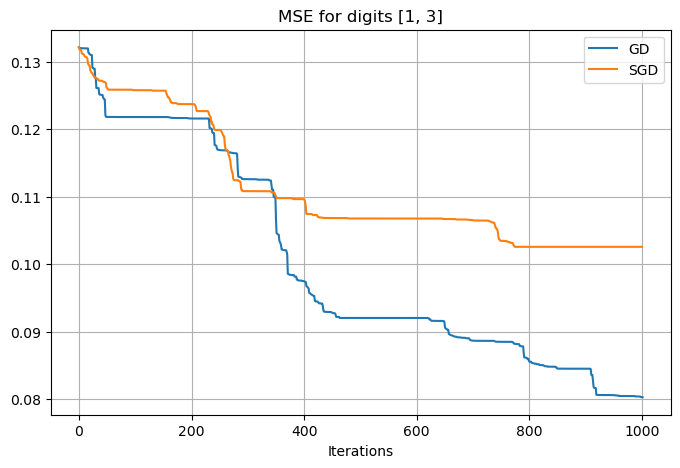

In [90]:
#select only the two digits passed from user___________________________________
digits = [1, 3]
#Load data into memory_________________________________________________________
df = pd.read_csv('./data/data.csv')
data = np.array(df) #convert to numpy array
Y = data[:, 0:1]
X = data[:, 1:]

X = X.T                                         #transpose to have dxN

#X, y = SelectDigits(X,Y, digits)
print(f'\nSelected digits: {digits}')
print(f'Number of pixels (stored in rows): {X.shape[0]}')
print(f'Number of digit samples (stored in columns): {X.shape[1]}')


X_hat = XHat(X)
Xdef, y = SelectClassesTarget(X_hat, Y, digits)

#defining number of training samples to be 75% of the total___________________
N_train = int(Xdef.shape[1]*0.75)
X_train, X_test, Y_train, Y_test = TrainTestSplit(Xdef, y, N_train)

print(f'Number of training samples: {X_train.shape[1]}')

print(f'Labes - {Y_train.shape}')

#randomly sample w0 for SGD-GD________________________________________________
w0 = np.random.randn(X_train.shape[0], 1)
#w0 = np.random.normal(0, 1e-3, X_train.shape[0]).reshape(-1,1)

w_gd, _, f_val_gd, grads_gd, err_gd = GD(MSE, MSEGrad, w0, data_ = (X_train, Y_train), kmax_= 1000, backtracking = True)
w_sgd, f_val_sgd, grads_sgd, err_sgd = SGD(MSE, MSEGrad, w0, data_ = (X_train, Y_train), batch_size_= 80, n_epochs_= 1000, alpha_= 1e-3)

print(f'w* GD: {w_gd[-1].mean()}')
print(f'w* SGD: {w_sgd[-1].mean()}')

acc_gd = Accuracy(X_test, Y_test, w_gd[-1], f_w, digits)
acc_sgd = Accuracy(X_test, Y_test, w_sgd[-1], f_w, digits)

print(f'Accuracy GD: {round(acc_gd, 6)}')
print(f'Accuracy SGD: {round(acc_sgd, 6)}')

plt.figure(figsize=(8, 5))

plt.plot(f_val_gd, label='GD')
plt.plot(f_val_sgd, label='SGD')
plt.xlabel('Iterations')
plt.title(f'MSE for digits {digits}')
plt.grid()
plt.legend()

plt.show()

##### Varying $N_{train}$


Selected digits: [1, 3]
Number of pixels (stored in rows): 784
Number of digit samples (stored in columns): 42000
Number of training samples: 2258
Labes - (2258, 1)


/var/folders/74/mfh_yx395gl1npjn4f386mpc0000gn/T/ipykernel_2769/2490666094.py:4: RuntimeWarning: overflow encountered in exp
  return 1./(1 + np.exp(-z_))


Iteration 1 MSE: 0.367389994487634, alpha: 0.0009765625
Iteration 2 MSE: 0.36738531843965516, alpha: 0.0009765625
Iteration 3 MSE: 0.3673817602982575, alpha: 0.0009765625
Iteration 4 MSE: 0.36737901372398496, alpha: 0.0009765625
Iteration 5 MSE: 0.3673768575054059, alpha: 0.0009765625
Iteration 6 MSE: 0.36737098104247323, alpha: 0.00390625
Iteration 7 MSE: 0.36703954700155456, alpha: 0.25
Iteration 8 MSE: 0.36701629747431375, alpha: 0.0009765625
Iteration 9 MSE: 0.3669966839864486, alpha: 0.0009765625
Iteration 10 MSE: 0.3669822451318193, alpha: 0.0009765625
Iteration 11 MSE: 0.36697193374934184, alpha: 0.0009765625
Iteration 12 MSE: 0.3669643017286189, alpha: 0.0009765625
Iteration 13 MSE: 0.36695839377657086, alpha: 0.0009765625
Iteration 14 MSE: 0.36694218058431644, alpha: 0.00390625
Iteration 15 MSE: 0.36693469695482783, alpha: 0.00390625
Iteration 16 MSE: 0.3669304836177197, alpha: 0.00390625
Iteration 17 MSE: 0.3669278141176631, alpha: 0.00390625
Iteration 18 MSE: 0.3664744170530

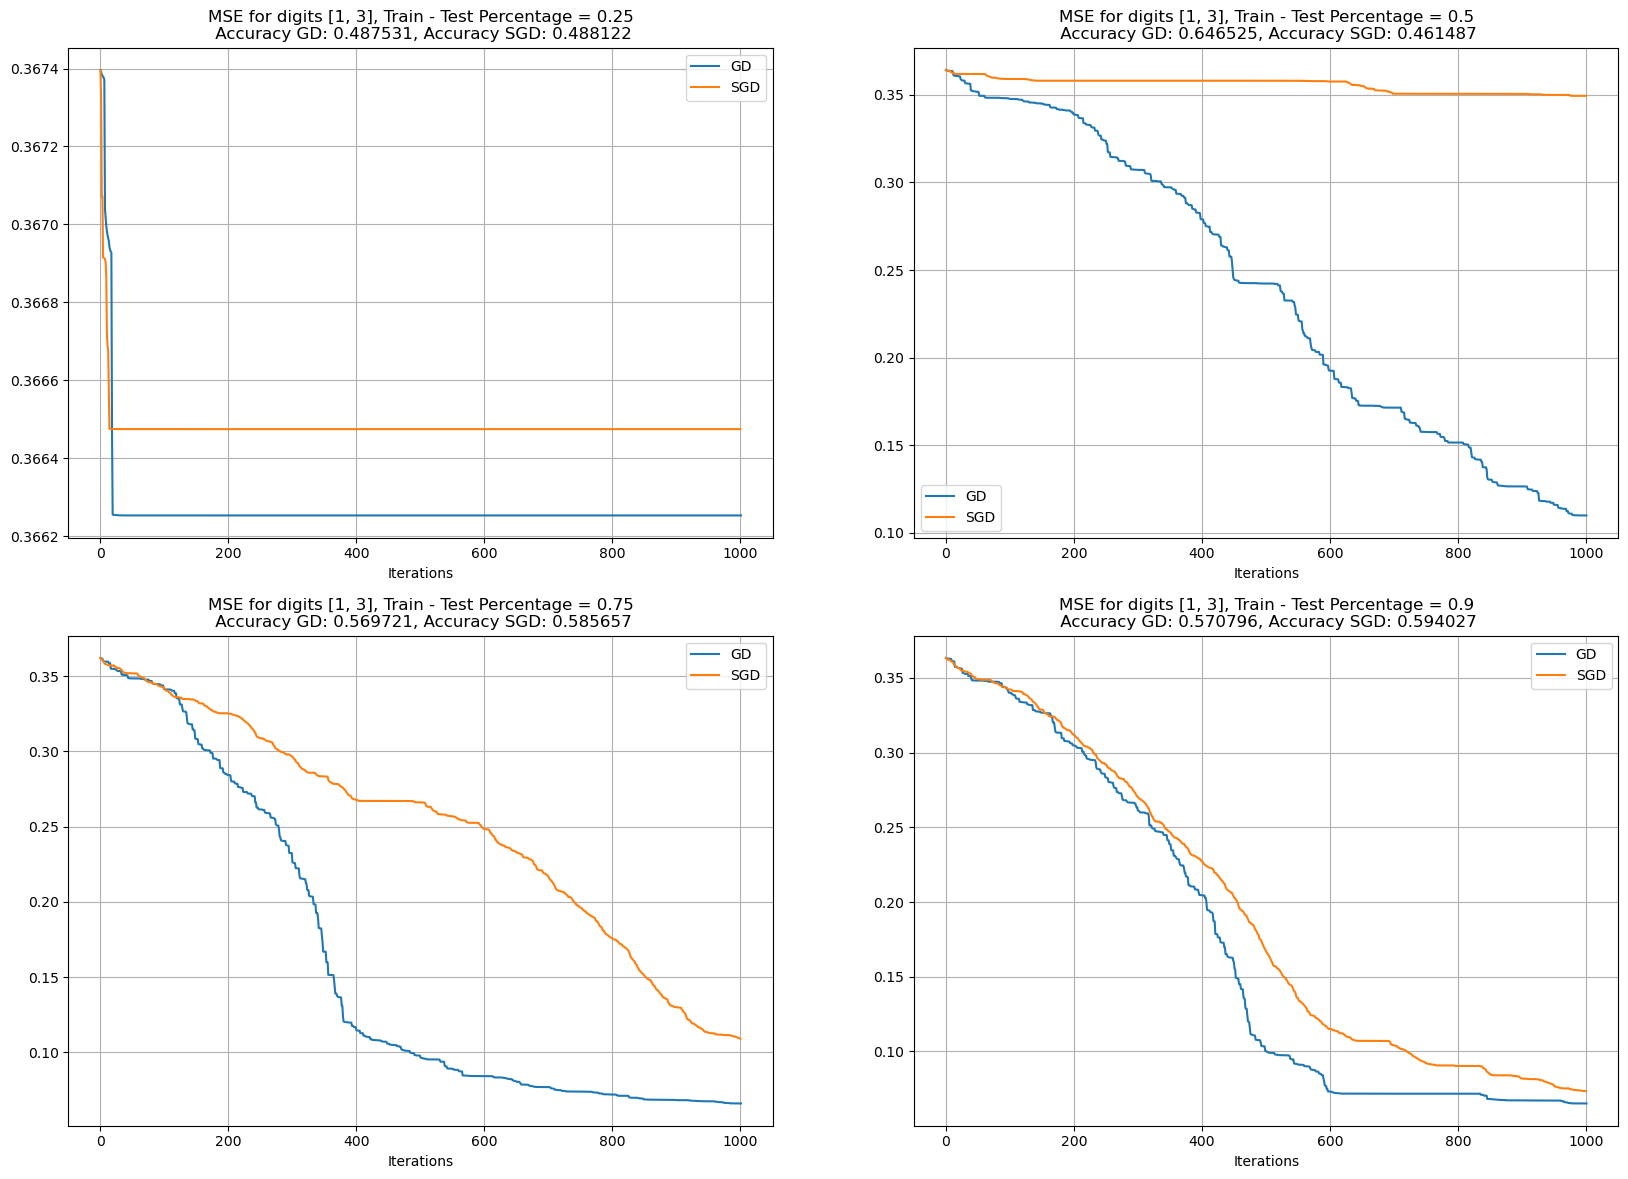

In [18]:
#select only the two digits passed from user___________________________________
digits = [1, 3]
#Load data into memory_________________________________________________________
df = pd.read_csv('./data/data.csv')
data = np.array(df) #convert to numpy array
Y = data[:, 0:1]
X = data[:, 1:]

X = X.T                                         #transpose to have dxN

#X, y = SelectDigits(X,Y, digits)
print(f'\nSelected digits: {digits}')
print(f'Number of pixels (stored in rows): {X.shape[0]}')
print(f'Number of digit samples (stored in columns): {X.shape[1]}')


X_hat = XHat(X)
Xdef, y = SelectClassesTarget(X_hat, Y, digits)

#defining number of training samples to be
w0 = np.random.randn(X_train.shape[0], 1)
train_perc = [0.25, 0.5, 0.75, 0.9]

plt.figure(figsize=(20, 14))
i=1
for perc in train_perc:
    N_train = int(Xdef.shape[1]*perc)
    X_train, X_test, Y_train, Y_test = TrainTestSplit(Xdef, y, N_train)

    print(f'Number of training samples: {X_train.shape[1]}')

    print(f'Labes - {Y_train.shape}')

    w_gd, _, f_val_gd, grads_gd, err_gd = GD(MSE, MSEGrad, w0, data_ = (X_train, Y_train), kmax_= 1000, backtracking = True)
    w_sgd, f_val_sgd, grads_sgd, err_sgd = SGD(MSE, MSEGrad, w0, data_ = (X_train, Y_train), batch_size_= 80, n_epochs_= 1000, alpha_= 1e-3)

    print(f'w* GD: {w_gd[-1].mean()}')
    print(f'w* SGD: {w_sgd[-1].mean()}')

    acc_gd = Accuracy(X_test, Y_test, w_gd[-1], f_w, digits)
    acc_sgd = Accuracy(X_test, Y_test, w_sgd[-1], f_w, digits)

    print(f'Accuracy GD: {round(acc_gd, 6)}')
    print(f'Accuracy SGD: {round(acc_sgd, 6)}')

    plt.subplot(2, 2, i)
    i+=1
    plt.plot(f_val_gd, label='GD')
    plt.plot(f_val_sgd, label='SGD')
    plt.xlabel('Iterations')
    plt.title(f'MSE for digits {digits}, Train - Test Percentage = {perc}\n Accuracy GD: {round(acc_gd, 6)}, Accuracy SGD: {round(acc_sgd, 6)}')
    plt.grid()
    plt.legend()

plt.show()